# Decision Trees

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
sns.set(palette='colorblind') # this improves contrast

from sklearn.metrics import confusion_matrix, classification_report

## Let's look at a toy dataset

Using a toy dataset here shows an easy to see challenge for the classifier that we have seen so far.  Real datasets will be hard in different ways, and since they're higher dimensional, it's harder to visualize the cause.

In [3]:
corner_data = 'https://raw.githubusercontent.com/rhodyprog4ds/06-naive-bayes/f425ba121cc0c4dd8bcaa7ebb2ff0b40b0b03bff/data/dataset6.csv'
df6= pd.read_csv(corner_data,usecols=[1,2,3])

In [4]:
gnb = GaussianNB()

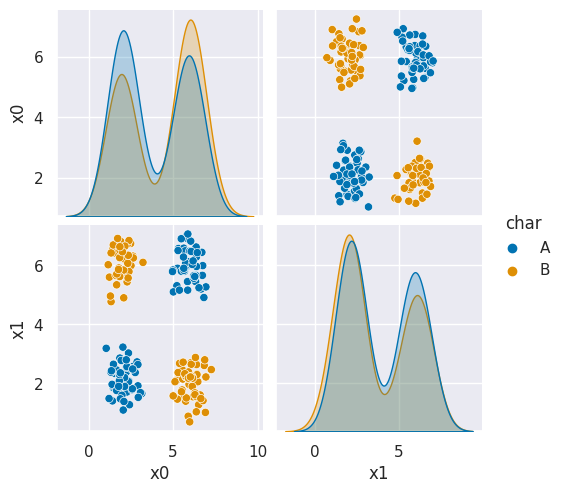

In [5]:
sns.pairplot(data=df6, hue='char',hue_order=['A','B'])

As we can see in this dataset, these classes are quite separated.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df6[['x0','x1']],
                          df6['char'],
                          random_state = 4)

In [7]:
gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)

0.72

But we do not get a very good classification score.

To see why, we can look at what it learned.

In [8]:
gnb.__dict__

{'priors': None,
 'var_smoothing': 1e-09,
 'classes_': array(['A', 'B'], dtype='<U1'),
 'feature_names_in_': array(['x0', 'x1'], dtype=object),
 'n_features_in_': 2,
 'epsilon_': 4.294249888888889e-09,
 'theta_': array([[3.91910256, 3.9624359 ],
        [4.42861111, 3.54222222]]),
 'var_': array([[4.0355774 , 3.99742099],
        [4.43948696, 4.14491451]]),
 'class_count_': array([78., 72.]),
 'class_prior_': array([0.52, 0.48])}

/opt/hostedtoolcache/Python/3.9.15/x64/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


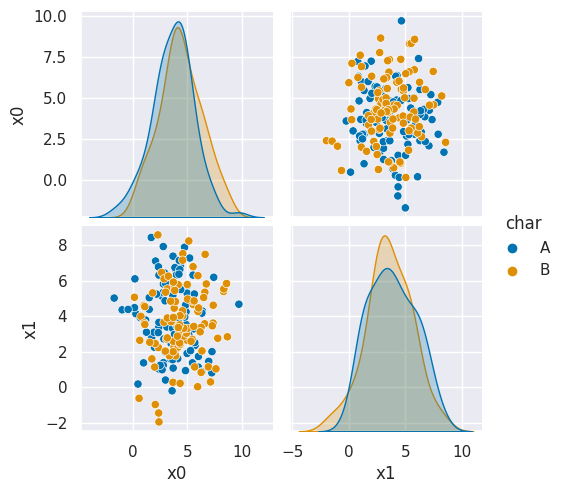

In [9]:
N = 100
gnb_df = pd.DataFrame(np.concatenate([np.random.multivariate_normal(th, sig*np.eye(2),N)
         for th, sig in zip(gnb.theta_,gnb.sigma_)]),
         columns = ['x0','x1'])
gnb_df['char'] = [ci for cl in [[c]*N for c in gnb.classes_] for ci in cl]

sns.pairplot(data =gnb_df, hue='char',hue_order=['A','B'])

This does not look much like the data and it's hard to tell which is higher at any given point in the 2D space.  We know though, that it has missed the mark. We can also look at the actual predictions.

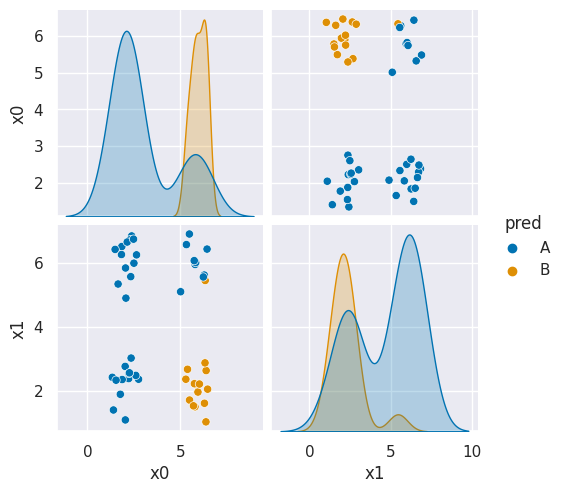

In [10]:
df6pred = X_test.copy()
df6pred['pred'] =gnb.predict(X_test)

sns.pairplot(df6pred, hue = 'pred',hue_order=['A','B'])

This makes it more clear. It basically learns one group that covers 3 blobs and only 1 for the second color. If we train again with a different random seed, it makes a different specific error, but basically the same idea.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df6[['x0','x1']],
                          df6['char'], random_state = 5)
gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)

0.34

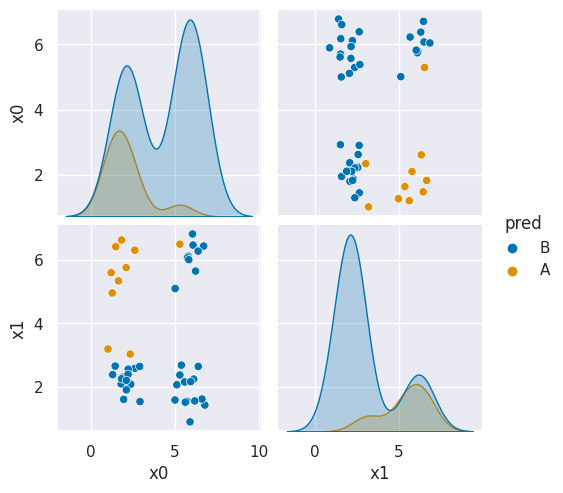

In [12]:
df6pred = X_test.copy()
df6pred['pred'] =gnb.predict(X_test)

sns.pairplot(df6pred, hue = 'pred')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df6[['x0','x1']],
                          df6['char'], random_state = 7)
gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)

0.58

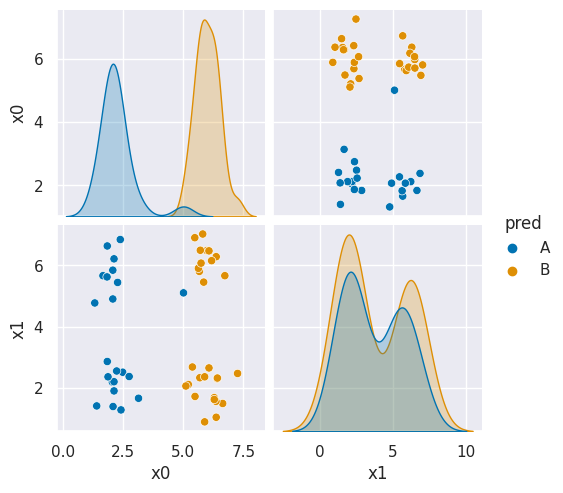

In [14]:
df6pred = X_test.copy()
df6pred['pred'] =gnb.predict(X_test)

sns.pairplot(df6pred, hue = 'pred')

If you try this again, split, fit, plot, it will learn different decisions, but always at least about 25% of the data will have to be classified incorrectly.

## Decision Trees

This data does not fit the assumptions of the Niave Bayes model, but a decision tree has a different rule. It can be more complex, but for the scikit learn one relies on splitting the data at a series of points along one axis at a time.  

It is a **discriminative** model, because it describes how to discriminate (in the sense of differentiate) between the classes.

In [15]:
dt = tree.DecisionTreeClassifier()

In [16]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
dt.score(X_test,y_test)

1.0

The sklearn estimator objects (that corresond to different models) all have the same API, so the `fit`, `predict`, and `score` methods are the same as above. We will see this also in regression and clustering.  What each method does in terms of the specific calculations will vary depending on the model, but they're always there.  

the `tree` module also allows you to plot the tree to examine it.

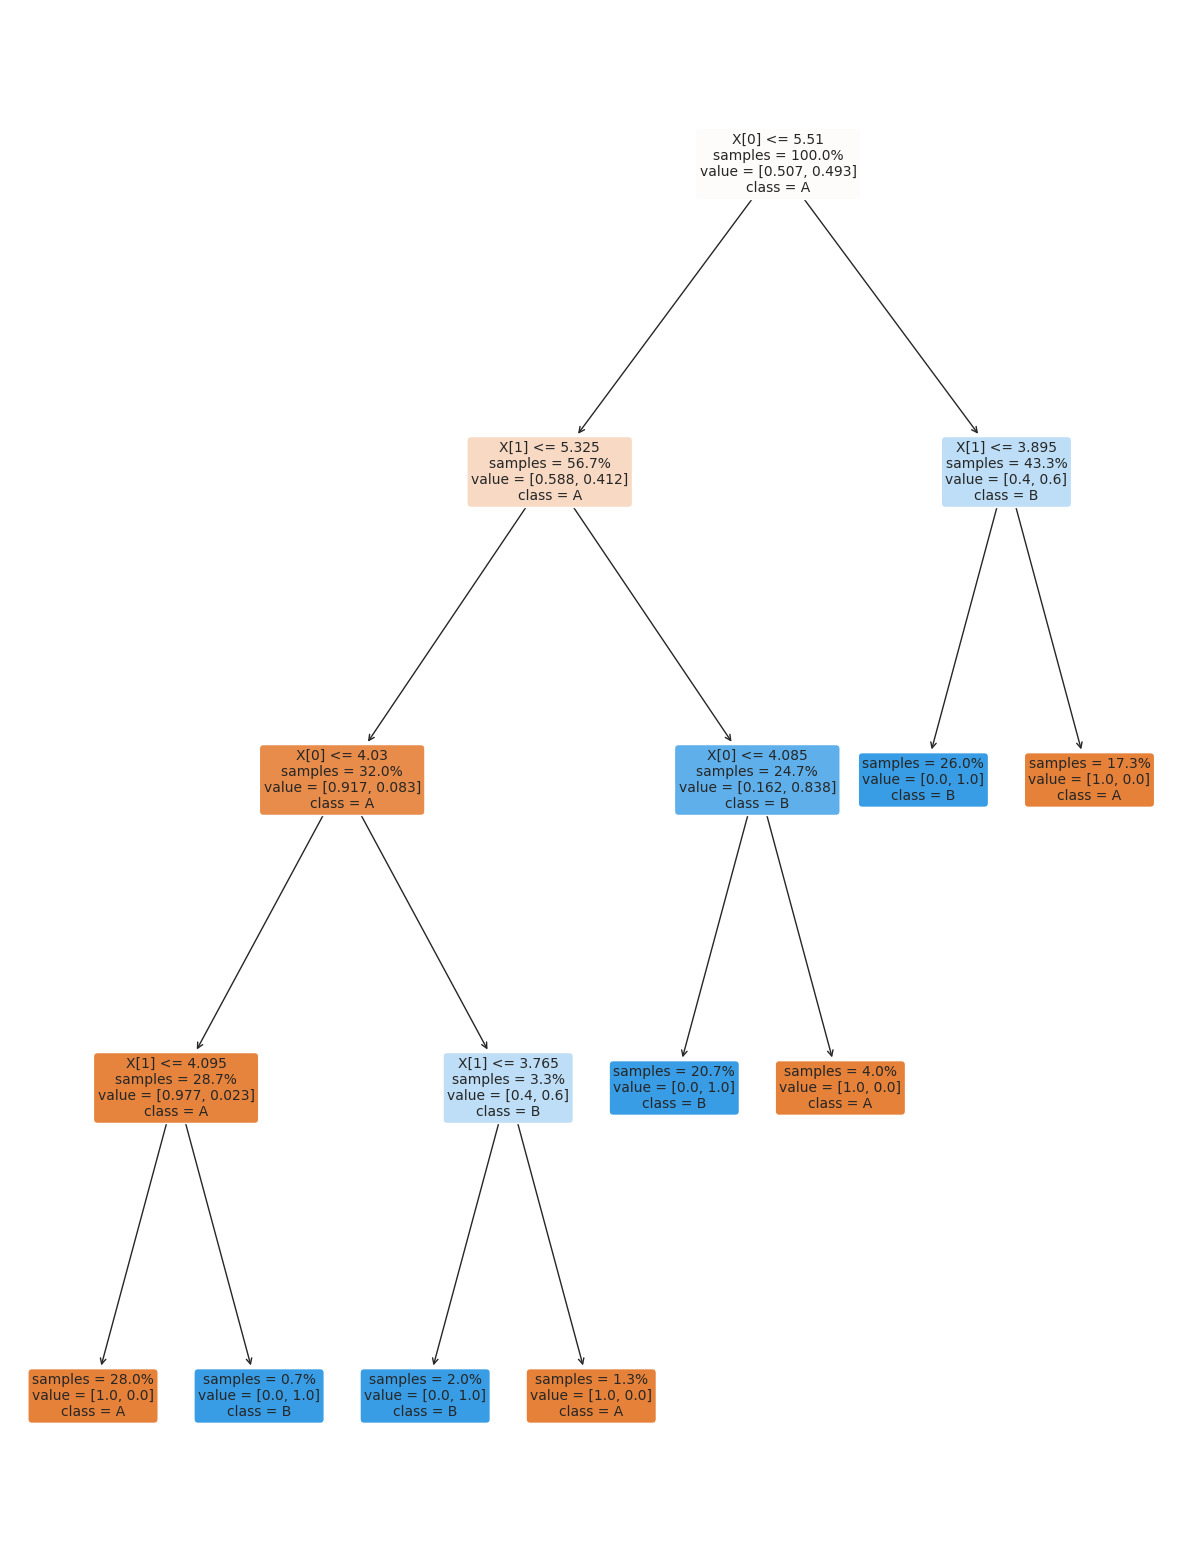

In [18]:
plt.figure(figsize=(15,20))
tree.plot_tree(dt, rounded =True, class_names = ['A','B'],
      proportion=True, filled =True, impurity=False,fontsize=10);

````{margin}
```{note}
On the iris dataset, the [sklearn docs include a diagram showing the decision boundary](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html) You should be able to modify this for another classifier.

```
````

## Setting Classifier Parameters

The decision tree we had above has a lot more layers than we would expect.  This is really simple data so we still got perfect classification. However, the more complex the model, the more risk that it will learn something noisy about the training data that doesn't hold up in the test set.  

Fortunately, we can control the parameters to make it find a simpler decision boundary.

In [19]:
dt2 = tree.DecisionTreeClassifier(max_depth=2)
dt2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

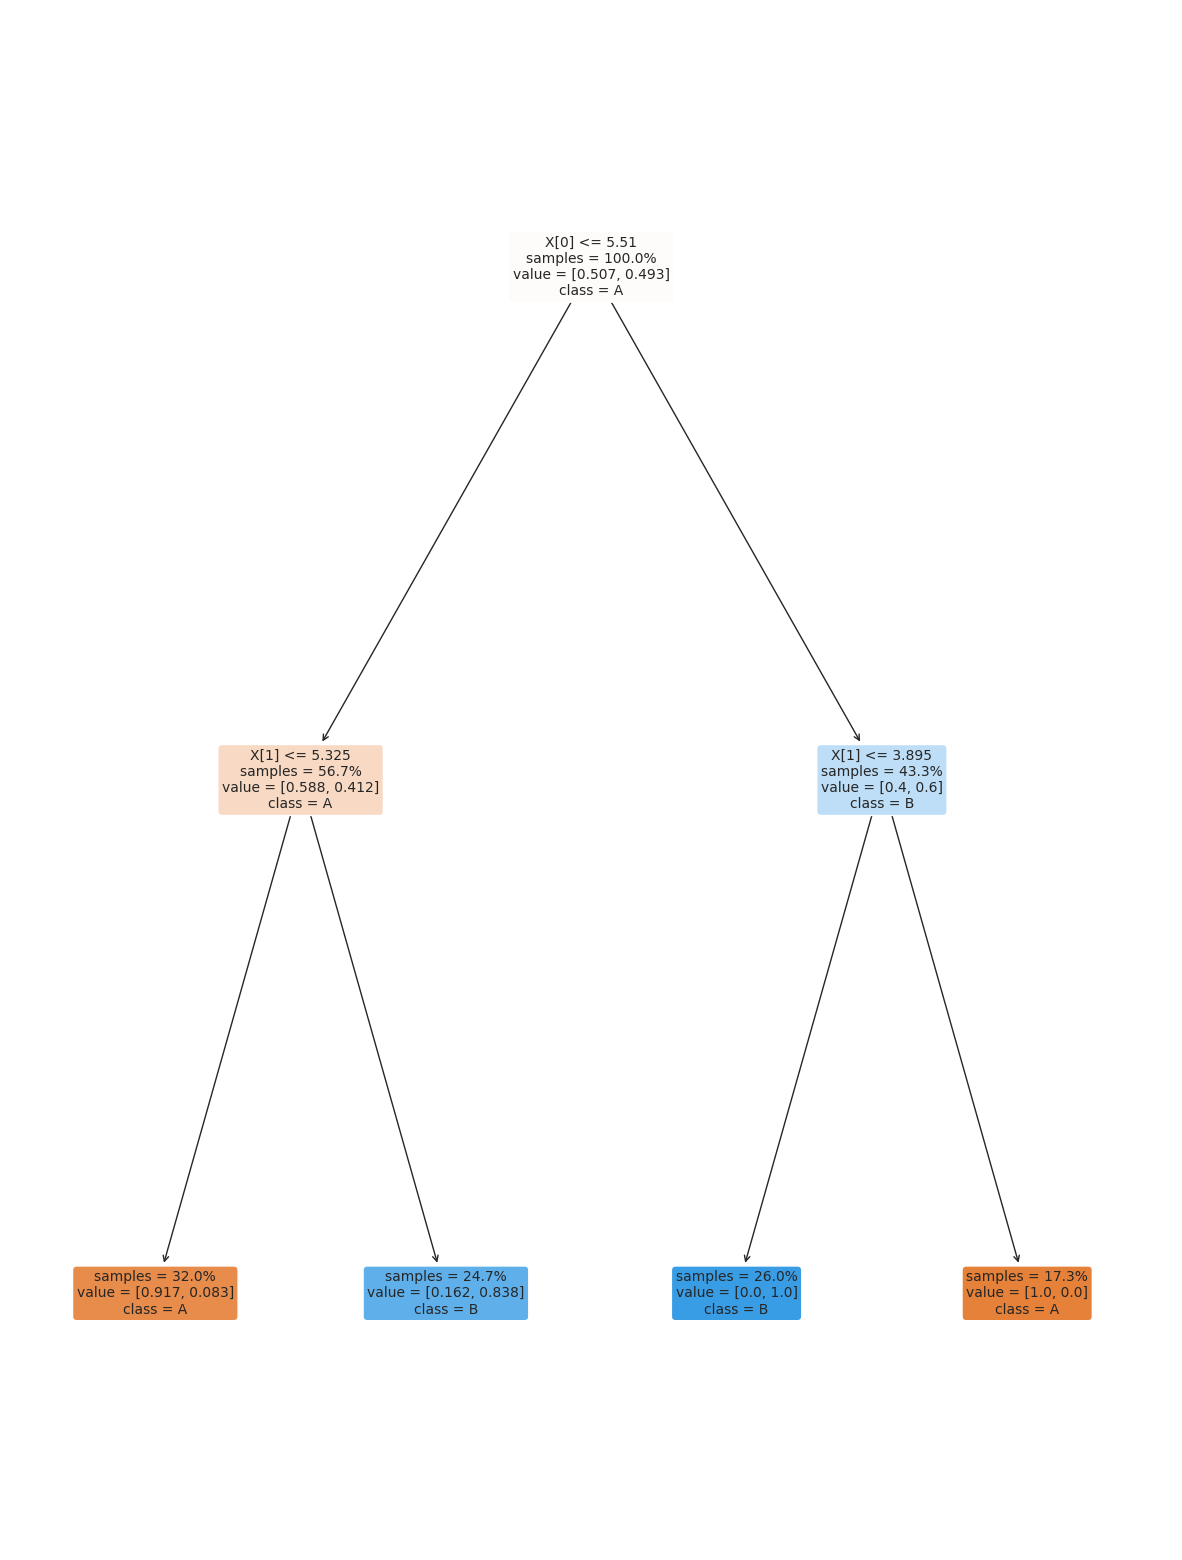

In [20]:
plt.figure(figsize=(15,20))
tree.plot_tree(dt2, rounded =True, class_names = ['A','B'],
      proportion=True, filled =True, impurity=False,fontsize=10);

In [21]:
dt2.score(X_test,y_test)

0.86

We might need to play with different parameters to get it just how we want it.  A simpler model is better because it will be more reliable in general.

In [22]:
dt2.score(X_test,y_test)

0.86

In [23]:
dt2_20 = tree.DecisionTreeClassifier(max_depth=2)
dt2_20.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [24]:
dt2_20.score(X_test, y_test)

0.86

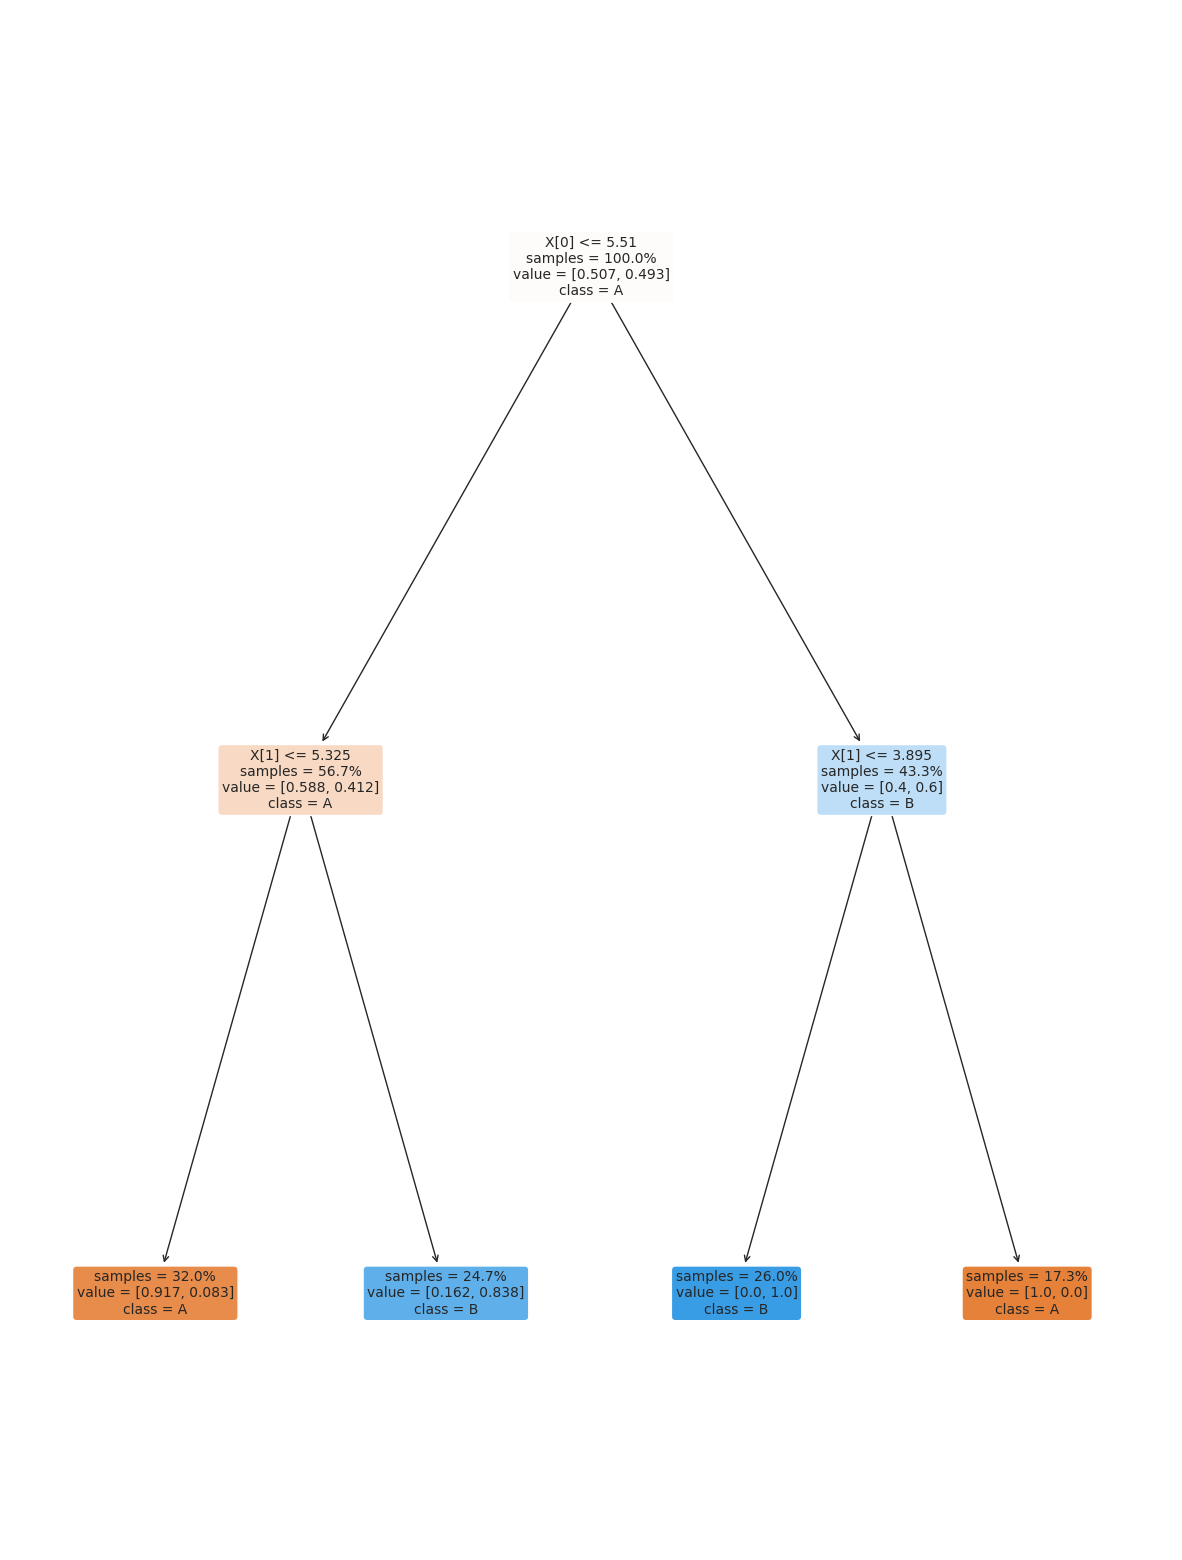

In [25]:
plt.figure(figsize=(15,20))
tree.plot_tree(dt2_20, rounded =True, class_names = ['A','B'],
      proportion=True, filled =True, impurity=False,fontsize=10);

## Questions After Class


### What do the dots and lines represent in the graph?  

The scatter plots, each dot is one sample (row from the DataFrame), the different sub plots are different views of the data, determined by different pairs of variables.

The lines are the density, when it's high it means values are likely , when it's low it means they are unlikely.

### What doe the GNB model do?

When we fit, it learns a description of the data.  When we predict it uses that description to predict the probability that each test sample belongs to each of the classes and returns the most probable one.  See the last notes for a visualization of the probabilities.

### Is xtrain ytrain, xtest ytest the same every time?

Generally no, with the `random_state` variable set on a given data they will be the same subset every time, but without it would get different rows.  For example:

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df6[['x0','x1']],
                          df6['char'],
                          random_state = 4)
X_train.head()

,x0,x1
110,5.91,2.39
154,6.07,6.47
16,6.84,2.61
19,6.27,1.99
2,2.27,5.44


In [27]:
X_train, X_test, y_train, y_test = train_test_split(df6[['x0','x1']],
                          df6['char'],
                          random_state = 4)
X_train.head()

,x0,x1
110,5.91,2.39
154,6.07,6.47
16,6.84,2.61
19,6.27,1.99
2,2.27,5.44


with random state, we get the same samples each time.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df6[['x0','x1']],
                          df6['char'])
X_train.head()

,x0,x1
60,5.71,6.49
76,2.58,1.82
52,6.05,2.70
59,2.91,1.92
159,6.22,5.65


In [29]:
X_train, X_test, y_train, y_test = train_test_split(df6[['x0','x1']],
                          df6['char'])
X_train.head()

,x0,x1
121,1.83,5.62
194,5.61,6.28
36,1.85,6.50
167,2.14,6.65
112,2.03,2.77


 without, we get different ones.

### I still want to know why it is worse to have a model that gets 100% accuracy with more depth to the decision tree flowchart than to have a model with less accuracy and less decisions in the decision tree.

This accuracy is only on one set of training data, we might not want the big accuracy drop we saw here ,but we could do other things to improve it.